In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Data on orbit
mu = 3.986004418e14
a = 6371e3 + 700e3
period = 2 * np.pi * np.sqrt(a**3/mu)
n = 2 * np.pi / period

def find_settle_times(data, thresh = np.deg2rad(0.1)): 
    '''
    Return the settling time of a controller time series. 
    data: ephemeris
    '''
    time = data[:,0]
    settling_times = np.zeros(3)
    
    for i in range(1, 4):
        settling_time_index = np.where((np.abs(data[:,i]) < thresh) == False)[0][-1]
        settling_times[i-1] = time[settling_time_index + 1]
        
    return np.max(settling_times) 

class Simulation:
    
    def __init__(self, state_history, state_history_m = False, control_torque = False):
        
        self.state_history = state_history 
        
        if type(state_history_m) != type(False):
            self.state_history_m = state_history_m
            
        if type(control_torque) != type(False):
            self.control_torque = control_torque
            
state_history = np.loadtxt('output/Q4/control/state_history.dat')
control_torque = np.loadtxt('output/Q4/control/control_torque.dat')
measurements = np.loadtxt('output/Q4/control/measurements.dat')
S2 = Simulation(state_history, control_torque = control_torque, state_history_m = measurements)


### Plotting time series

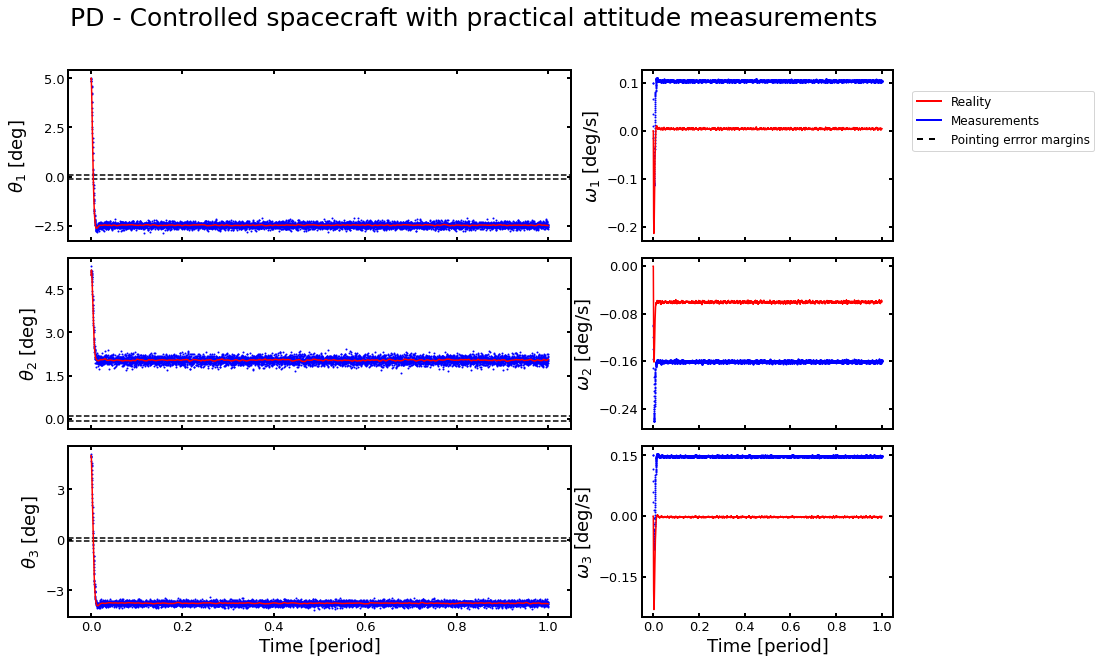

In [20]:
labels = [r"$\theta_1$ [deg]", r"$\theta_2$ [deg]", r"$\theta_3$ [deg]",
          "$\omega_1$ [deg/s]", "$\omega_2$ [deg/s]", "$\omega_3$ [deg/s]"]


fig, axes = plt.subplots(3, 2, figsize = (13, 9), sharex = True, gridspec_kw={'width_ratios':[2,1]})
fig.tight_layout(pad=4)
fig.suptitle("PD - Controlled spacecraft with practical attitude measurements", fontsize = 25, y = 1.03)
fig.subplots_adjust(hspace= 0.1)
axes[2, 0].set_xlabel("Time [period]", fontsize = 18)
axes[2, 1].set_xlabel("Time [period]", fontsize = 18)

for ax in axes[:,0]:
    #ax.set_xlim(0, 500)
    #ax.set_ylim(-0.8, 0.8)
    ax.axhline(-0.1, color = 'k', linestyle = '--')
    ax.axhline(0.1, color = 'k', linestyle = '--')


for i, ax in enumerate(axes.T.flat): 
    
    ax.plot(S2.state_history_m[:,0]/period, np.rad2deg(S2.state_history_m[:,1+i]), 'bo', markersize = 1, label = "Observation")
    ax.plot(S2.state_history[:,0]/period, np.rad2deg(S2.state_history[:,1+i]), 'r-', markersize = 1)
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))

    ax.set_ylabel(labels[i], fontsize = 18)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(labelsize=13)
    ax.tick_params(axis="both",direction="in",which="both", length=4, width = 2)
    ax.tick_params(bottom=True, top=True, left=True, right=True)
    
custom_lines = [Line2D([0], [0], color='r', lw=2),
                Line2D([0], [0], color='b', lw=2), 
               Line2D([0], [0], color='k', dashes = [3, 3], lw=2)]

fig.legend(custom_lines, ["Reality", "Measurements", "Pointing errror margins"], 
           bbox_to_anchor = (1.17, 0.91), fontsize = 12)

### Plotting zoomed-in time series

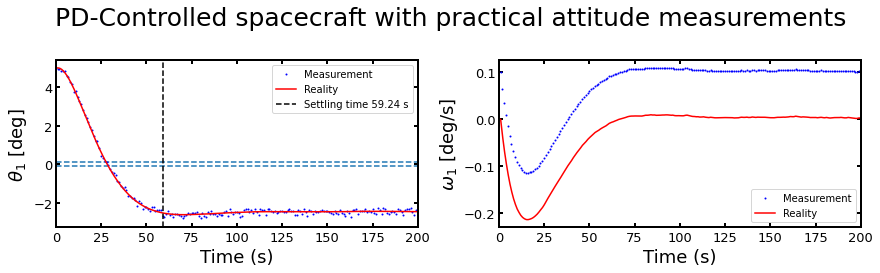

In [21]:
labels = [r"$\theta_1$ [deg]", "$\omega_1$ [deg/s]"]

fig, axes = plt.subplots(1, 2, figsize = (13, 4), sharex = True)
fig.tight_layout(pad=5)
fig.suptitle("PD-Controlled spacecraft with practical attitude measurements", fontsize = 25, y = 1)
axes[0].set_xlabel("Time (s)", fontsize = 18)
axes[1].set_xlabel("Time (s)", fontsize = 18)

axes[0].axhline(-0.1, linestyle = '--')
axes[0].axhline(0.1, linestyle = '--')
    
    
for i, ax in enumerate(axes): 
    ax.set_xlim(0, 200)
    ax.plot(S2.state_history_m[:,0], np.rad2deg(S2.state_history_m[:,3*i+1]), 'bo', markersize = 1, label = "Measurement")
    ax.plot(S2.state_history[:,0], np.rad2deg(S2.state_history[:,3*i+1]), 'r-', markersize = 1, label = "Reality")

    ax.set_ylabel(labels[i], fontsize = 18)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(labelsize=13)
    ax.tick_params(axis="both",direction="in",which="both", length=4, width = 2)
    ax.tick_params(bottom=True, top=True, left=True, right=True)
    

axes[0].axvline(59.24, linestyle = '--', color = 'k', linewidth = 1.5, label = "Settling time 59.24 s")
for ax in axes: 
    ax.legend()
